In [40]:
# Importing the required packages
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

### Data Understanding

In [41]:
# Reading the data
df=pd.read_csv("/content/news_data.xls")

In [42]:
# Dataframe
df

,headline,category
0,The AI companions you can have conversations with,tech
1,Brianna's mum wants mindfulness taught in schools,tech
2,Choristers celebrate Star Wars Grammy Award,tech
3,Chicken shop boss loses £12k in Tesla trademar...,tech
4,Council to save £200k through job losses due t...,tech
...,...,...
2391,‘I am very pleased and relieved…that my baggy ...,sport
2392,Ranji Trophy: Can Rinku step up to find a path...,sport
2393,"Virat Kohli, Rohit Sharma are keen to play T20...",sport
2394,"One-and-a-half days, 107 overs: India win shor...",sport


In [43]:
# Null values in the dataframe
df.isnull().sum()

headline    0
category    0
dtype: int64

<Axes: xlabel='count', ylabel='category'>

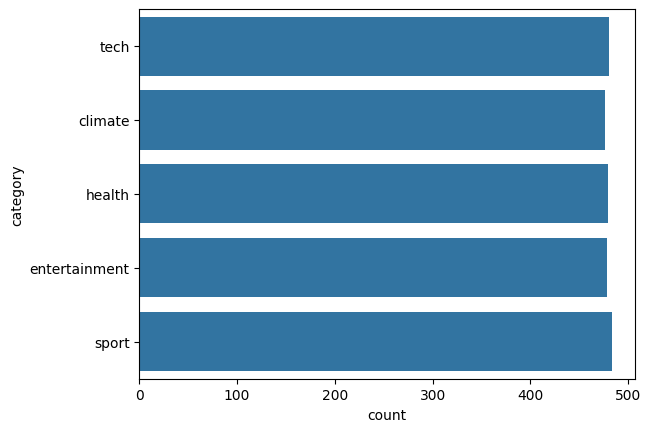

In [44]:
# Classifiers
# Finding out the total number of plots and headlines:
sns.countplot(y=df['category'])

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

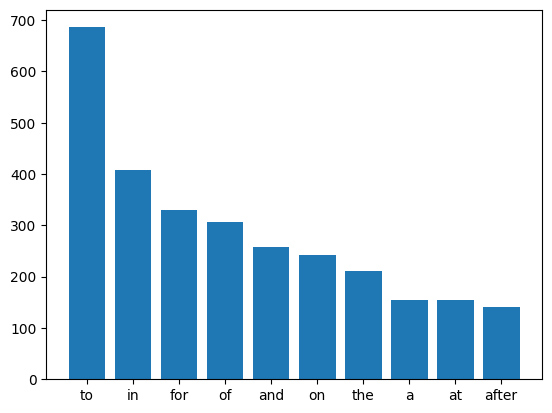

In [46]:
# Visualizing the stopwords
from nltk.corpus import stopwords
def plot_stopwords(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1

    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(df['headline'])

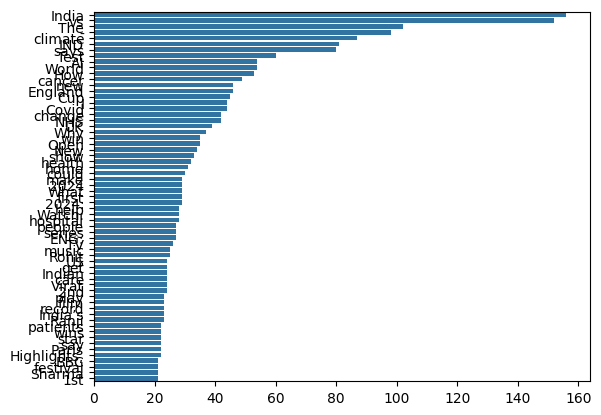

In [47]:
# Visualizing the frequent word
import collections
from collections import Counter
def top_frequent_words(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)
top_frequent_words(df['headline'])

### Data Preprocessing

In [48]:
# Lowercasing the column
df['headline']=df['headline'].str.lower()

In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
# Tokenization
df['text_clean'] = df['headline'].apply(nltk.word_tokenize)
print('Step 1-Tokenization Done!.')
df.head()

Step 1-Tokenization Done!.


,headline,category,text_clean
0,the ai companions you can have conversations with,tech,"[the, ai, companions, you, can, have, conversa..."
1,brianna's mum wants mindfulness taught in schools,tech,"[brianna, 's, mum, wants, mindfulness, taught,..."
2,choristers celebrate star wars grammy award,tech,"[choristers, celebrate, star, wars, grammy, aw..."
3,chicken shop boss loses £12k in tesla trademar...,tech,"[chicken, shop, boss, loses, £12k, in, tesla, ..."
4,council to save £200k through job losses due t...,tech,"[council, to, save, £200k, through, job, losse..."


In [51]:
# Removal of stopword
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)

    return result

In [52]:
df['text_clean'] = df['text_clean'].apply(remove_stopwords)
df.head()

,headline,category,text_clean
0,the ai companions you can have conversations with,tech,"[ai, companions, conversations]"
1,brianna's mum wants mindfulness taught in schools,tech,"[brianna, 's, mum, wants, mindfulness, taught,..."
2,choristers celebrate star wars grammy award,tech,"[choristers, celebrate, star, wars, grammy, aw..."
3,chicken shop boss loses £12k in tesla trademar...,tech,"[chicken, shop, boss, loses, £12k, tesla, trad..."
4,council to save £200k through job losses due t...,tech,"[council, save, £200k, job, losses, due, ai]"


In [53]:
# Removal of punctuation
from nltk.tokenize import RegexpTokenizer

def remove_punct(text):

    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

In [54]:
df['text_clean'] = df['text_clean'].apply(remove_punct)
df.head()

,headline,category,text_clean
0,the ai companions you can have conversations with,tech,"[ai, companions, conversations]"
1,brianna's mum wants mindfulness taught in schools,tech,"[brianna, s, mum, wants, mindfulness, taught, ..."
2,choristers celebrate star wars grammy award,tech,"[choristers, celebrate, star, wars, grammy, aw..."
3,chicken shop boss loses £12k in tesla trademar...,tech,"[chicken, shop, boss, loses, 12k, tesla, trade..."
4,council to save £200k through job losses due t...,tech,"[council, save, 200k, job, losses, due, ai]"


In [55]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df["text_clean"] = df["text_clean"].apply(lambda x: [stemmer.stem(y) for y in x])

#### Encoding

In [56]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))

tf_idf1 = tf_idf.fit_transform(df[['text_clean']])

tf_idf1


<1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [57]:
df['category'].unique()

array(['tech', 'climate', 'health', 'entertainment', 'sport'],
      dtype=object)

In [58]:
cat={'tech':0,'climate':1,'health':2,'entertainment':3,'sport':4}
df['category'] = df['category'].replace(cat)
df['category'].unique()

array([0, 1, 2, 3, 4])

### Model

In [81]:
from sklearn.model_selection import train_test_split
X = df.text_clean
y = df.category
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 1)

In [82]:
# Converting the string
X_train=X_train.apply(str)
X_test=X_test.apply(str)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words = 'english',lowercase=False)
# fit the vectorizer on the training data
vector.fit(X_train)
vector.vocabulary_
X_transformed = vector.transform(X_train)
X_transformed.toarray()
# for test data
X_test_transformed = vector.transform(X_test)

#### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_transformed, y_train)
# Fitting our Logistic Regression Model

LogisticRegression()

In [85]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(logistic_reg.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(logistic_reg.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       125
           1       0.77      0.78      0.77       120
           2       0.73      0.80      0.76       127
           3       0.70      0.68      0.69       122
           4       0.90      0.94      0.92       105

    accuracy                           0.75       599
   macro avg       0.76      0.76      0.76       599
weighted avg       0.75      0.75      0.75       599



[[ 76  12  15  18   4]
 [ 10  93  10   6   1]
 [  8   6 101  11   1]
 [ 12  10  12  83   5]
 [  4   0   1   1  99]]


#### Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_transformed, y_train)

RandomForestClassifier()

In [87]:
print(classification_report(rf.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(rf.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.58      0.75      0.66        85
           1       0.96      0.56      0.71       208
           2       0.66      0.81      0.73       114
           3       0.59      0.80      0.68        87
           4       0.89      0.93      0.91       105

    accuracy                           0.73       599
   macro avg       0.74      0.77      0.74       599
weighted avg       0.78      0.73      0.73       599



[[ 64   0   9  11   1]
 [ 24 116  32  28   8]
 [  9   3  92   9   1]
 [  9   1   5  70   2]
 [  4   1   1   1  98]]


#### Naive bayes

In [88]:
from sklearn.naive_bayes import MultinomialNB
naivebayes = MultinomialNB()
naivebayes.fit(X_transformed, y_train)

MultinomialNB()

In [89]:
print(classification_report(naivebayes.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(naivebayes.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       102
           1       0.74      0.77      0.75       115
           2       0.80      0.76      0.78       146
           3       0.69      0.77      0.73       107
           4       0.93      0.79      0.85       129

    accuracy                           0.76       599
   macro avg       0.76      0.76      0.76       599
weighted avg       0.77      0.76      0.76       599



[[ 72   7   8  14   1]
 [ 11  89   8   5   2]
 [ 11   8 111  13   3]
 [  9   7   7  82   2]
 [  7  10   5   5 102]]


#### Support vector machine

In [90]:
# Importing SVM
from sklearn.svm import SVC, LinearSVC

svm = LinearSVC()
svm.fit(X_transformed, y_train)


LinearSVC()

In [91]:
print(classification_report(svm.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(svm.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       108
           1       0.81      0.74      0.77       132
           2       0.75      0.82      0.78       127
           3       0.71      0.68      0.70       125
           4       0.92      0.94      0.93       107

    accuracy                           0.77       599
   macro avg       0.77      0.77      0.77       599
weighted avg       0.77      0.77      0.77       599



[[ 71   9  11  15   2]
 [ 11  98  14   8   1]
 [  8   4 104   9   2]
 [ 16  10  10  85   4]
 [  4   0   0   2 101]]


#### Decision tree classifier


In [92]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_transformed,y_train)

DecisionTreeClassifier()

In [93]:
print(classification_report(dt.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(dt.predict(X_test_transformed), y_test))


              precision    recall  f1-score   support

           0       0.59      0.64      0.61       102
           1       0.80      0.61      0.70       158
           2       0.64      0.74      0.68       121
           3       0.58      0.73      0.64        95
           4       0.90      0.80      0.85       123

    accuracy                           0.70       599
   macro avg       0.70      0.70      0.70       599
weighted avg       0.72      0.70      0.70       599



[[65  9 16 12  0]
 [15 97 19 23  4]
 [10  7 89 11  4]
 [11  5  7 69  3]
 [ 9  3  8  4 99]]


#### Pickling

In [94]:
import pickle
# Pickling the trained model knowledge
with open("news_classifier_pkl","wb") as files:
  pickle.dump(logistic_reg, files)

In [99]:
# Testing
headline1 = ["Six Nations 2024: Italy 'close to getting big scalps,' says Ireland's Jack Conan"]
vec = vector.transform(headline1).toarray()
print('Headline:', *headline1)
print((list(svm.predict(vec))[0]))


Headline: Six Nations 2024: Italy 'close to getting big scalps,' says Ireland's Jack Conan
4
